In [20]:
# 코랩에서 드라이브를 마운트합니다.  
from google.colab import drive  
drive.mount('/content/gdrive')

# cd [모듈 위치] 
%cd /content/gdrive/My Drive/Kaggle/Regression

!pip install import_ipynb 
import import_ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle/Regression
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import

In [22]:
import pandas as pd
import numpy as np
from Metrics import Metrics, Visualize

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder, RobustScaler, MaxAbsScaler
from sklearn.compose import make_column_selector
from category_encoders import BinaryEncoder

from tqdm import tqdm

In [23]:
pd.set_option('display.max_row', 500)

In [24]:
v = Visualize() 

In [25]:
df = pd.read_csv('train.csv')

df

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,36 Kentucky Boulevard,Hocking,475000,4,2,2.0,533,198,2007.0,21200,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0
18506,18506,10 Regatta Boulevard,Champion Lakes,485000,3,2,2.0,344,237,2010.0,22100,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0
18507,18507,145 Coolgardie Avenue,Redcliffe,642000,3,1,1.0,1016,110,1953.0,8900,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,NaN
18508,18508,12 Mckenzie Road,Samson,491000,4,2,2.0,718,176,1988.0,14600,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0


In [26]:
X = df[df.columns.difference(['PRICE'])].copy()
y = df.loc[:, "PRICE"].copy()

In [27]:
X['rooms'] = X['BEDROOMS'] + X['BATHROOMS'] + X['GARAGE']
# X['DIST'] = (X['NEAREST_STN_DIST'] + X['NEAREST_SCH_DIST'] + X['CBD_DIST'])/3

In [28]:
X["ADDRESS"].nunique()

18491

In [29]:
X["SUBURB"].nunique()

318

In [30]:
X["NEAREST_SCH"].nunique()

159

In [31]:
X["NEAREST_STN"].nunique()

68

In [32]:
X["POSTCODE"].nunique()

114

In [33]:
X["NEAREST_SCH_RANK"].nunique()

103

In [34]:
X.drop(labels='ID',axis=1, inplace = True)
X.drop(labels='ADDRESS', axis = 1, inplace = True)

# X.drop(labels ='SUBURB', axis = 1, inplace = True)
# X.drop(labels ='NEAREST_SCH', axis = 1, inplace = True)
# X.drop(labels ='NEAREST_STN', axis = 1, inplace = True)


# X.drop(labels='NEAREST_SCH_RANK',axis=1, inplace = True)

# X.drop(labels='BUILD_YEAR',axis=1, inplace = True)
# X.drop(labels='GARAGE',axis=1, inplace = True)

# X.drop(labels='POSTCODE',axis=1, inplace = True)

In [35]:
# X["SOLD_MONTH"] = X.DATE_SOLD.str.split('-').str[0]
# X["SOLD_MONTH"] = pd.to_numeric(X["SOLD_MONTH"])

X["SOLD_YEAR"] = X.DATE_SOLD.str.split('-').str[1].str[:-1]
X["SOLD_YEAR"] = pd.to_numeric(X["SOLD_YEAR"])

X.drop(labels='DATE_SOLD',axis=1, inplace = True)

In [36]:
X.isnull().sum()

BATHROOMS              0
BEDROOMS               0
BUILD_YEAR          1728
CBD_DIST               0
FLOOR_AREA             0
GARAGE              1367
LAND_AREA              0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    6000
NEAREST_STN            0
NEAREST_STN_DIST       0
POSTCODE               0
SUBURB                 0
rooms               1367
SOLD_YEAR              0
dtype: int64

In [37]:
X['POSTCODE'] = X['POSTCODE'].astype(str)

# X['NEAREST_SCH_RANK'].fillna(140.0, inplace = True)

display(X.isnull().sum())

BATHROOMS              0
BEDROOMS               0
BUILD_YEAR          1728
CBD_DIST               0
FLOOR_AREA             0
GARAGE              1367
LAND_AREA              0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    6000
NEAREST_STN            0
NEAREST_STN_DIST       0
POSTCODE               0
SUBURB                 0
rooms               1367
SOLD_YEAR              0
dtype: int64

In [38]:
X['POSTCODE'].nunique()

114

In [39]:
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")

scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MaxAbsScaler()

binary_encoder = BinaryEncoder(cols=['NEAREST_STN', 'NEAREST_SCH', 'SUBURB', 'POSTCODE'])

ct = ColumnTransformer([
      ("imputer", imputer, make_column_selector(dtype_include=np.number)),
      ("b_encoder", binary_encoder, make_column_selector(dtype_include=object)),
], remainder="passthrough")

pipeline = Pipeline([
    ('ct', ct),
    ('scaler', scaler),
])
pipeline.fit(X)

X = pd.DataFrame(pipeline.transform(X))

X

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.302088,1.776974,0.859800,1.377415,1.142256,1.307726,-0.110758,1.706867,-1.340641,-0.418351,...,1.051343,-0.344724,-0.831653,-0.845389,-0.946435,-0.987437,-0.993860,-1.016011,-0.998920,0.991500
1,3.764404,1.776974,1.209827,-0.261007,1.626868,-0.145133,-0.117643,0.896527,-0.096193,-0.649971,...,-0.951164,-0.344724,-0.831653,-0.845389,-0.946435,-0.987437,-0.993860,-1.016011,1.001081,-1.008573
2,0.302088,0.450050,0.109742,1.201240,0.505338,-0.145133,-0.105260,1.562089,-1.492622,-0.659437,...,1.051343,-0.344724,-0.831653,-0.845389,-0.946435,-0.987437,-0.993860,-1.016011,1.001081,0.991500
3,-1.429071,-2.203798,-2.590466,-1.441375,0.020726,-0.145133,-0.123552,0.194645,-0.345690,-0.753006,...,1.051343,-0.344724,-0.831653,-0.845389,-0.946435,-0.987437,-0.993860,0.984241,-0.998920,-1.008573
4,0.302088,-0.876874,0.709788,-0.613355,0.034572,-0.145133,-0.117334,-0.399580,-1.010217,0.026055,...,-0.951164,-0.344724,-0.831653,-0.845389,-0.946435,-0.987437,-0.993860,0.984241,-0.998920,0.991500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,0.302088,0.450050,0.859800,0.117768,0.200724,-0.145133,-0.118002,1.101725,-0.464377,-0.404114,...,-0.951164,-0.344724,1.202424,-0.845389,-0.946435,-0.987437,1.006178,0.984241,-0.998920,0.991500
18506,0.302088,-0.876874,1.009812,0.197047,0.740721,-0.145133,-0.127714,-0.864229,0.962575,-0.003362,...,1.051343,-0.344724,-0.831653,1.182887,1.056596,-0.987437,-0.993860,0.984241,1.001081,-1.008573
18507,-1.429071,-0.876874,-1.840408,-0.965704,-1.017728,-0.871563,-0.093185,0.165086,0.600734,0.195219,...,-0.951164,-0.344724,-0.831653,-0.845389,-0.946435,1.012723,1.006178,-1.016011,1.001081,-1.008573
18508,0.302088,0.450050,-0.090273,-0.463607,-0.103889,-0.145133,-0.108497,-0.616922,-0.720839,-0.908188,...,1.051343,-0.344724,-0.831653,1.182887,1.056596,1.012723,1.006178,0.984241,-0.998920,0.991500


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       18510 non-null  float64
 1   1       18510 non-null  float64
 2   2       18510 non-null  float64
 3   3       18510 non-null  float64
 4   4       18510 non-null  float64
 5   5       18510 non-null  float64
 6   6       18510 non-null  float64
 7   7       18510 non-null  float64
 8   8       18510 non-null  float64
 9   9       18510 non-null  float64
 10  10      18510 non-null  float64
 11  11      18510 non-null  float64
 12  12      18510 non-null  float64
 13  13      18510 non-null  float64
 14  14      18510 non-null  float64
 15  15      18510 non-null  float64
 16  16      18510 non-null  float64
 17  17      18510 non-null  float64
 18  18      18510 non-null  float64
 19  19      18510 non-null  float64
 20  20      18510 non-null  float64
 21  21      18510 non-null  float64
 22

# test_code()

In [41]:
def test_code(X, pipeline) :
  X['rooms'] = X['BEDROOMS'] + X['BATHROOMS'] + X['GARAGE']

  X.drop(labels='ID',axis=1, inplace = True)
  X.drop(labels='ADDRESS', axis = 1, inplace = True)

  # X.drop(labels ='SUBURB', axis = 1, inplace = True)
  # X.drop(labels ='NEAREST_SCH', axis = 1, inplace = True)
  # X.drop(labels ='NEAREST_STN', axis = 1, inplace = True)


  # X.drop(labels='NEAREST_SCH_RANK',axis=1, inplace = True)
  # X.drop(labels='BUILD_YEAR',axis=1, inplace = True)
  # X.drop(labels='GARAGE',axis=1, inplace = True)

  X['POSTCODE'] = X['POSTCODE'].astype(str)
  # X['NEAREST_SCH_RANK'].fillna(140.0, inplace = True)
  
  # X["SOLD_MONTH"] = X.DATE_SOLD.str.split('-').str[0]
  # X["SOLD_MONTH"] = pd.to_numeric(X["SOLD_MONTH"])

  X["SOLD_YEAR"] = X.DATE_SOLD.str.split('-').str[1].str[:-1]
  X["SOLD_YEAR"] = pd.to_numeric(X["SOLD_YEAR"])

  X.drop(labels='DATE_SOLD',axis=1, inplace = True)

  X = pd.DataFrame(pipeline.transform(X))
  
  return X

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [43]:
# X_train, y_train = cut_iqr(X_y_df = (X_train.copy(), y_train.copy()), coefficient = 6)

# v.show_boxplot(X_train)

# Model

In [44]:
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, AdaBoostRegressor
import xgboost
from sklearn.neighbors import KNeighborsRegressor

import random

In [45]:
def HGTree(num) :
  result = []

  for i in range(num) :
    m = HistGradientBoostingRegressor(
        max_iter = 10000,
        max_depth = 5,
        max_leaf_nodes  = 14,
        random_state = random.randrange(0, 100000),
        n_iter_no_change = 150,
        l2_regularization = 150,
    )

    result.append((f'm{i}', m))

  return result


In [46]:
def HGForest(depth, width) :
  if depth == 0 :
    m = HistGradientBoostingRegressor(
        max_iter = 10000,
        max_depth = 5,
        max_leaf_nodes  = 14,
        random_state = random.randrange(0, 100000),
        n_iter_no_change = 150,
        l2_regularization = 150,
    )

    return m

  estimators = []

  for i in range(width) :
    m = HGForest(depth - 1, width)

    estimators.append((f'm{i}', m))

  model = VotingRegressor(estimators = estimators, n_jobs = -1)
  return model

In [47]:
y_test.reset_index(0, drop = True, inplace = True)

In [48]:
model = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 42,
    n_iter_no_change = 150,
    l2_regularization = 150,
)

metrics = Metrics(model, (X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()))

metrics.ret_result_regression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Result
구분,
MAE,8.127244e+04
MSE,1.734352e+10
RMSE,1.316948e+05
R2_score,8.546545e-01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


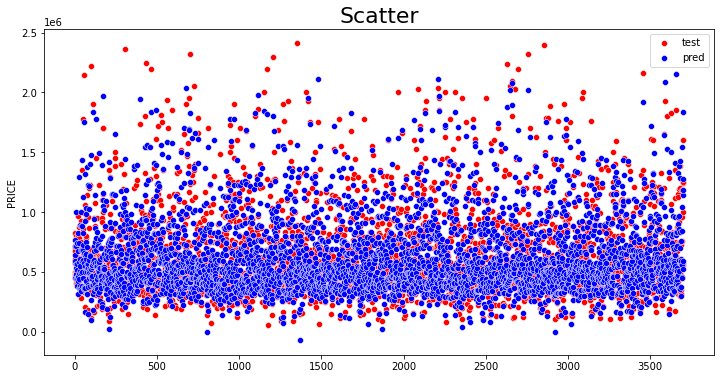

In [ ]:
metrics.show_scatter()

In [ ]:
model = HGForest(depth = 1, width = 10)

metrics = Metrics(model, (X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()))

metrics.ret_result_regression()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Result
구분,
MAE,8.061029e+04
MSE,1.726285e+10
RMSE,1.313882e+05
R2_score,8.553305e-01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


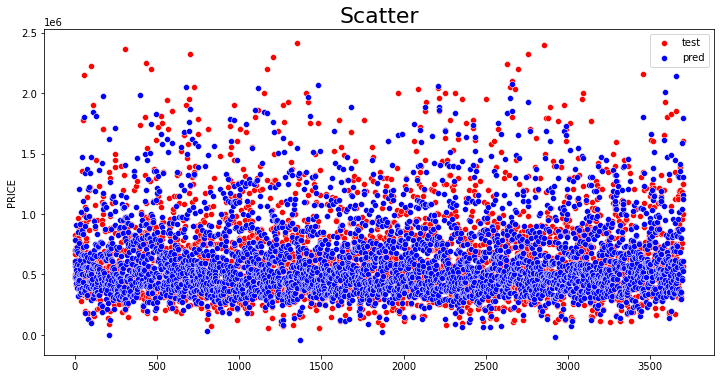

In [ ]:
metrics.show_scatter()

### best case

In [ ]:
m1 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 42,
    n_iter_no_change = 150,
    l2_regularization = 150,
)
m2 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 7,
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m3 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 1,
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m4 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 77,
    n_iter_no_change = 150,
    l2_regularization = 150,
)


m5 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 100,
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m6 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m7 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m8 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m9 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m10 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)


model = VotingRegressor(estimators = [
    ('m1', m1), ('m2', m2), ('m3', m3), ('m4', m4), ('m5', m5), ('m6', m6), ('m7', m7), ('m8', m8), ('m9', m9), ('m10', m10)
    ], n_jobs = -1)

metrics = Metrics(model, (X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()))

metrics.ret_result_regression()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Result
구분,
MAE,8.051518e+04
MSE,1.713465e+10
RMSE,1.308994e+05
R2_score,8.564049e-01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


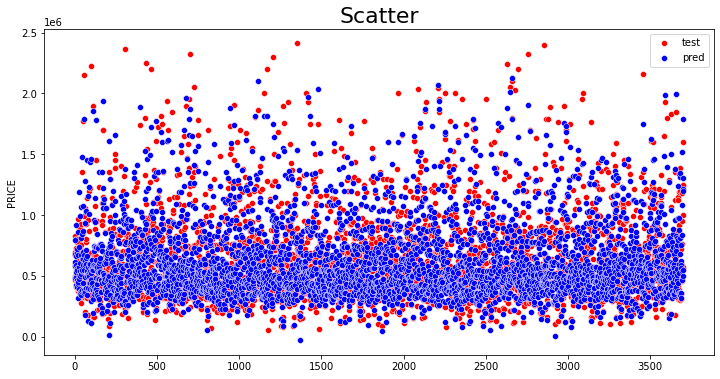

In [ ]:
metrics.show_scatter()

In [ ]:
import warnings
warnings.filterwarnings( 'ignore' )

In [ ]:
from Model_Selection import model_selection

importing Jupyter notebook from Model_Selection.ipynb


In [ ]:
# model_selection(type_filter = "regressor", X_y = (X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()))

# **TEST**

In [ ]:
m1 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 42,
    n_iter_no_change = 150,
    l2_regularization = 150,
)
m2 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 7,
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m3 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 1,
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m4 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 77,
    n_iter_no_change = 150,
    l2_regularization = 150,
)


m5 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = 100,
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m6 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m7 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m8 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m9 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)

m10 = HistGradientBoostingRegressor(
    max_iter = 10000,
    max_depth = 5,
    max_leaf_nodes  = 14,
    random_state = random.randrange(101, 100000),
    n_iter_no_change = 150,
    l2_regularization = 150,
)


test_model = model = VotingRegressor(estimators = [
    ('m1', m1), ('m2', m2), ('m3', m3), ('m4', m4), ('m5', m5), ('m6', m6), ('m7', m7), ('m8', m8), ('m9', m9), ('m10', m10)
    ], n_jobs = -1)

In [ ]:
X = X_train.append(X_test)
y = y_train.append(y_test)

In [ ]:
test_model.fit(X, y)

VotingRegressor(estimators=[('m1',
                             HistGradientBoostingRegressor(l2_regularization=150,
                                                           max_depth=5,
                                                           max_iter=10000,
                                                           max_leaf_nodes=14,
                                                           n_iter_no_change=150,
                                                           random_state=42)),
                            ('m2',
                             HistGradientBoostingRegressor(l2_regularization=150,
                                                           max_depth=5,
                                                           max_iter=10000,
                                                           max_leaf_nodes=14,
                                                           n_iter_no_change=150,
                                                           random_state=7)),

In [ ]:
test = pd.read_csv('test.csv')

id_df = pd.DataFrame(test["ID"], columns = ["ID"])
id_df

,ID
0,18510
1,18511
2,18512
3,18513
4,18514
...,...
15141,33651
15142,33652
15143,33653
15144,33654


In [ ]:
test_X = test_code(test.copy(), pipeline)
test_X

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.302088,-0.876874,-1.990420,0.857701,-0.339272,0.581296,-0.032400,0.342261,2.428436,-0.270951,...,-0.951164,-0.344724,1.202424,1.182887,-0.946435,1.012723,1.006178,-1.016011,1.001081,-1.008573
1,2.033246,0.450050,0.559777,-1.027365,2.180710,-0.145133,-0.119236,-0.324156,-0.170422,-0.529098,...,1.051343,2.900872,-0.831653,-0.845389,-0.946435,1.012723,-0.993860,-1.016011,1.001081,0.991500
2,2.033246,0.450050,-0.390296,-0.824764,0.934565,-0.145133,-0.108137,-0.455686,-0.446282,-0.103030,...,1.051343,-0.344724,1.202424,-0.845389,1.056596,-0.987437,-0.993860,0.984241,-0.998920,0.991500
3,0.302088,-0.876874,0.959808,0.373221,-0.200811,-0.145133,-0.124785,1.234583,-0.634186,0.211994,...,-0.951164,-0.344724,1.202424,-0.845389,1.056596,-0.987437,-0.993860,0.984241,-0.998920,-1.008573
4,-1.429071,-0.876874,0.159746,2.090921,-1.059267,-0.871563,-0.121034,-2.101625,-0.963573,-0.335154,...,-0.951164,-0.344724,-0.831653,-0.845389,1.056596,1.012723,1.006178,0.984241,1.001081,0.991500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,-1.429071,-0.876874,0.309758,-0.798338,-1.045420,0.000000,-0.104232,0.577104,-0.377930,-0.264368,...,1.051343,-0.344724,1.202424,-0.845389,1.056596,-0.987437,-0.993860,-1.016011,-0.998920,0.991500
15142,0.302088,0.450050,0.409765,-0.595738,-0.353118,-0.145133,-0.118157,-0.440610,0.614354,-0.166874,...,1.051343,-0.344724,1.202424,1.182887,-0.946435,1.012723,-0.993860,-1.016011,1.001081,-1.008573
15143,0.302088,-0.876874,-1.990420,-0.454798,-0.491578,-0.145133,-0.090308,0.604116,-1.032347,-0.024165,...,1.051343,-0.344724,-0.831653,-0.845389,1.056596,1.012723,-0.993860,0.984241,1.001081,-1.008573
15144,2.033246,1.776974,0.009734,0.443691,2.942243,-0.145133,0.882045,0.458688,1.933762,0.957197,...,-0.951164,-0.344724,-0.831653,-0.845389,-0.946435,1.012723,1.006178,-1.016011,-0.998920,0.991500


In [ ]:
test_y = test_model.predict(test_X)



In [ ]:
id_df["PRICE"] = test_y


id_df.set_index("ID", inplace = True)




id_df

,PRICE
ID,
18510,4.935320e+05
18511,1.553294e+06
18512,1.075406e+06
18513,4.855074e+05
18514,2.294279e+05
...,...
33651,3.246364e+05
33652,4.458500e+05
33653,1.169388e+06


In [ ]:
display(id_df[id_df.loc[:, 'PRICE'] < 0])
# 0보다 작은 값은 0
id_df[id_df.loc[:, 'PRICE'] < 0] = 0

display(id_df[id_df.loc[:, 'PRICE'] < 0])

,PRICE
ID,
21471,-15865.628902
32192,-126423.898463


,PRICE
ID,


In [ ]:
id_df.to_csv('submit3.csv')
